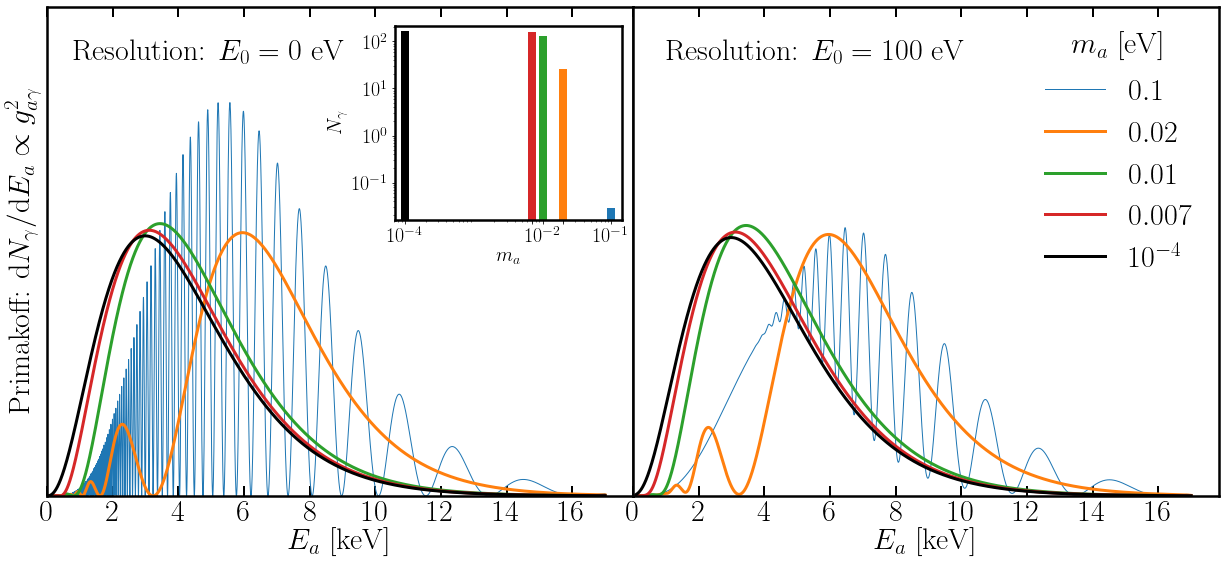

In [28]:
from numpy import *
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from AxionFuncs import PhotonNumber_Primakoff, smear

# init plot
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig = plt.figure(figsize=(21,9))
gs = gridspec.GridSpec(1, 2, wspace=0.0)


ax = fig.add_subplot(gs[0])


na = 5000
Ea = linspace(0.01,17,na)

F = PhotonNumber_Primakoff(1.0,Ea,0.1)
plt.plot(Ea,F/sum(F),linewidth=1,label=r'$0.1$')

F = PhotonNumber_Primakoff(1.0,Ea,0.02)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.02$')

F = PhotonNumber_Primakoff(1.0,Ea,0.01)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.01$')

F = PhotonNumber_Primakoff(1.0,Ea,0.007)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.007$')

F = PhotonNumber_Primakoff(1.0,Ea,1e-4)
plt.plot(Ea,F/sum(F),'k',linewidth=3,label=r'$10^{-4}$')

#plt.text(-3,0.0013/2,r'$g_{a\gamma}$',fontsize=50)

# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0,top=0.0013)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xticks(fontsize=30)
plt.xlabel(r"$E_a$ [keV]",fontsize=30)
plt.yticks([], [])
plt.ylabel(r"Primakoff: ${\rm d}N_\gamma/{\rm d}E_a \propto g_{a\gamma}^2$",fontsize=30);
plt.text(0.8,0.00115,r'Resolution: $E_0 = 0$ eV',fontsize=30)



left, bottom, width, height = [0.355, 0.55, 0.15, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
mvals = (array([0.1,0.02,0.01,0.007,1e-4]))
plt.sca(ax2)
for i in range(0,size(mvals)-1):
    F = PhotonNumber_Primakoff(0.1**4.0,Ea,mvals[i]) #0.1 scale for g = 1e-11
    plt.plot([mvals[i],mvals[i]],[0,trapz(F,Ea)],linewidth=8)
F = PhotonNumber_Primakoff(0.1**4.0,Ea,mvals[-1])
plt.plot([mvals[-1],mvals[-1]],[0,trapz(F,Ea)],'k-',linewidth=8)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
ax2.set_xticks(mvals)
plt.ylabel(r"$N_\gamma$",fontsize=20);
plt.xlabel(r"$m_a$",fontsize=20);





ax = fig.add_subplot(gs[1])

Eres = 100e-3
Ea = linspace(Eres,17,na)

F = smear(PhotonNumber_Primakoff(1.0,Ea,0.1),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=1,label=r'$0.1$')

F = smear(PhotonNumber_Primakoff(1.0,Ea,0.02),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.02$')

F = smear(PhotonNumber_Primakoff(1.0,Ea,0.01),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.01$')

F = smear(PhotonNumber_Primakoff(1.0,Ea,0.007),Ea,Eres)
plt.plot(Ea,F/sum(F),linewidth=3,label=r'$0.007$')

F = smear(PhotonNumber_Primakoff(1.0,Ea,1e-4),Ea,Eres)
plt.plot(Ea,F/sum(F),'k',linewidth=3,label=r'$10^{-4}$')

# Plot fiddling
ax.set_xlim(left=0.0)
ax.set_ylim(bottom=0.0,top=0.0013)
ax.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True)
ax.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
plt.xticks(fontsize=30)
plt.xlabel(r"$E_a$ [keV]",fontsize=30)
plt.yticks([], [])
#plt.ylabel(r"X-ray spectrum $\propto {\rm d}N_\gamma/{\rm d}E_a$",fontsize=30);
leg = plt.legend(fontsize=30,frameon=False,title=r'$m_a$ [eV]')
plt.setp(leg.get_title(),fontsize=30)
plt.text(1,0.00115,r'Resolution: $E_0 = 100$ eV',fontsize=30)




plt.show()
fig.savefig('../plots/XraySpectra_Photon.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/XraySpectra_Photon.png',bbox_inches='tight')
